# Task
Analyze the provided Google Play Store dataset to identify key factors influencing app visibility and success, such as size, price, and category, using data visualization to present the findings. The dataset is located at "googleplaystore.csv".

## Load the data

### Subtask:
Load the `googleplaystore.csv` file into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the data into a pandas DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv('/content/googleplaystore.csv')

**Reasoning**:
Display the first few rows of the DataFrame to verify that the data was loaded correctly.



In [2]:
display(df.head())

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Explore the data

### Subtask:
Get a sense of the data by displaying the first few rows, checking for missing values, and understanding the data types of each column.


**Reasoning**:
Display the first 5 rows, check for missing values and data types as requested by the instructions.



In [3]:
display(df.head())
df.info()
print(df.isnull().sum())

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Pr

## Clean the data

### Subtask:
Handle missing values and convert columns to appropriate data types for analysis (e.g., converting 'Reviews' and 'Installs' to numeric).


**Reasoning**:
Drop rows with missing values in the specified columns as instructed.



In [4]:
df.dropna(subset=['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver'], inplace=True)

**Reasoning**:
Convert the 'Reviews', 'Size', 'Installs', and 'Price' columns to numeric data types, handling the specific cleaning steps required for each as described in the instructions.



In [20]:
import numpy as np

df['Reviews'] = pd.to_numeric(df['Reviews'])

df['Size'] = df['Size'].astype(str).str.replace('M', 'e6').str.replace('k', 'e3').replace('Varies with device', np.nan)
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

df['Installs'] = df['Installs'].astype(str).str.replace(',', '').str.replace('+', '').astype(int)

# Convert 'Price' to string before applying string operations
df['Price'] = df['Price'].astype(str).str.replace('$', '').astype(float)

display(df.head())
df.info()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            7723 non-null   float64
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1023.8+ KB


**Reasoning**:
The previous attempt to convert the 'Size' column to float failed because `pd.NA` introduced `NAType` which cannot be directly converted to float. I will try again but replace 'Varies with device' with `np.nan` instead of `pd.NA`.



In [6]:
import numpy as np

df['Reviews'] = pd.to_numeric(df['Reviews'])

df['Size'] = df['Size'].str.replace('M', 'e6').str.replace('k', 'e3').replace('Varies with device', np.nan).astype(float)

df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

df['Price'] = df['Price'].str.replace('$', '').astype(float)

display(df.head())
df.info()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            7723 non-null   float64
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1023.8+ KB


## Analyze the impact of categories

### Subtask:
Explore how different app categories relate to factors like ratings, reviews, and installs.


**Reasoning**:
Group the DataFrame by 'Category', calculate the mean of 'Rating', 'Reviews', and 'Installs' for each category, sort by mean 'Installs' in descending order, and display the result.



In [7]:
category_metrics = df.groupby('Category')[['Rating', 'Reviews', 'Installs']].mean()
category_metrics_sorted = category_metrics.sort_values(by='Installs', ascending=False)
display(category_metrics_sorted)

,Rating,Reviews,Installs
Category,,,
COMMUNICATION,4.158537,2.486164e+06,9.953427e+07
SOCIAL,4.255598,2.398614e+06,5.432371e+07
PRODUCTIVITY,4.211396,3.251189e+05,4.038766e+07
VIDEO_PLAYERS,4.063750,6.898731e+05,3.888686e+07
NEWS_AND_MAGAZINES,4.132189,2.334760e+05,3.217258e+07
GAME,4.286326,1.445232e+06,3.198347e+07
PHOTOGRAPHY,4.192114,6.735540e+05,3.182411e+07
TRAVEL_AND_LOCAL,4.109292,2.770698e+05,3.039318e+07
ENTERTAINMENT,4.126174,3.971688e+05,1.925611e+07


## Analyze the impact of size

### Subtask:
Investigate the relationship between app size and its performance metrics.


**Reasoning**:
Calculate the correlation matrix for the relevant numerical columns and display the correlation values between 'Size' and the other performance metrics.



In [8]:
correlation_matrix = df[['Size', 'Rating', 'Reviews', 'Installs']].corr()
print("Correlation between Size and other metrics:")
print(correlation_matrix['Size'])

Correlation between Size and other metrics:
Size        1.000000
Rating      0.083640
Reviews     0.240382
Installs    0.162707
Name: Size, dtype: float64


**Reasoning**:
Interpret the calculated correlation values between 'Size' and the other performance metrics.



In [9]:
print("Interpretation of correlation between Size and other metrics:")
print(f"- Size and Rating: The correlation coefficient is {correlation_matrix.loc['Size', 'Rating']:.4f}. This value is close to zero, suggesting a very weak positive linear relationship. This means that larger app size is not strongly associated with higher ratings.")
print(f"- Size and Reviews: The correlation coefficient is {correlation_matrix.loc['Size', 'Reviews']:.4f}. This indicates a weak positive linear relationship. While there is a tendency for larger apps to have slightly more reviews, the relationship is not strong.")
print(f"- Size and Installs: The correlation coefficient is {correlation_matrix.loc['Size', 'Installs']:.4f}. This also shows a weak positive linear relationship. Similar to reviews, larger apps tend to have slightly more installs, but the correlation is not strong enough to suggest a significant impact of size on the number of installs.")

Interpretation of correlation between Size and other metrics:
- Size and Rating: The correlation coefficient is 0.0836. This value is close to zero, suggesting a very weak positive linear relationship. This means that larger app size is not strongly associated with higher ratings.
- Size and Reviews: The correlation coefficient is 0.2404. This indicates a weak positive linear relationship. While there is a tendency for larger apps to have slightly more reviews, the relationship is not strong.
- Size and Installs: The correlation coefficient is 0.1627. This also shows a weak positive linear relationship. Similar to reviews, larger apps tend to have slightly more installs, but the correlation is not strong enough to suggest a significant impact of size on the number of installs.


## Analyze the impact of price

### Subtask:
Analyze if and how the price of an app influences its success.


**Reasoning**:
Group the DataFrame by 'Type' and calculate the mean of the specified columns to compare metrics between Free and Paid apps.



In [10]:
price_impact = df.groupby('Type')[['Rating', 'Reviews', 'Installs']].mean()
display(price_impact)

,Rating,Reviews,Installs
Type,,,
Free,4.186288,551374.454389,1.922582e+07
Paid,4.266822,14476.885271,1.130102e+05


## Analyze the impact of other factors

### Subtask:
Explore other potential factors like content rating, genres, etc. and their relation to app success.


**Reasoning**:
Group the DataFrame by 'Content Rating' and calculate the mean of 'Rating', 'Reviews', and 'Installs', then display the result.



In [11]:
content_rating_impact = df.groupby('Content Rating')[['Rating', 'Reviews', 'Installs']].mean()
display(content_rating_impact)

,Rating,Reviews,Installs
Content Rating,,,
Adults only 18+,4.300000,2.711600e+04,6.666667e+05
Everyone,4.186472,3.779065e+05,1.539649e+07
Everyone 10+,4.257179,1.722914e+06,3.333440e+07
Mature 17+,4.123427,4.276915e+05,1.198342e+07
Teen,4.233487,1.043839e+06,3.202595e+07
Unrated,4.100000,1.186000e+03,5.000000e+04


**Reasoning**:
Group the DataFrame by 'Genres' and calculate the mean of 'Rating', 'Reviews', and 'Installs', then display the head of the resulting DataFrame due to the large number of genres.



In [12]:
genres_impact = df.groupby('Genres')[['Rating', 'Reviews', 'Installs']].mean()
display(genres_impact.head())

,Rating,Reviews,Installs
Genres,,,
Action,4.285475,9.785026e+05,2.609508e+07
Action;Action & Adventure,4.311765,1.378545e+05,5.177676e+06
Adventure,4.180822,4.072835e+05,5.571168e+06
Adventure;Action & Adventure,4.423077,3.087739e+06,6.970385e+07
Adventure;Brain Games,4.600000,7.148000e+03,1.000000e+05


## Visualize the findings

### Subtask:
Create appropriate visualizations (e.g., bar plots, scatter plots) to illustrate the relationships found in the analysis.


**Reasoning**:
Create bar plots for average installs per category, average metrics for free vs. paid apps, and average installs per content rating, and scatter plots for Size vs. Reviews and Size vs. Installs. Then display all plots.



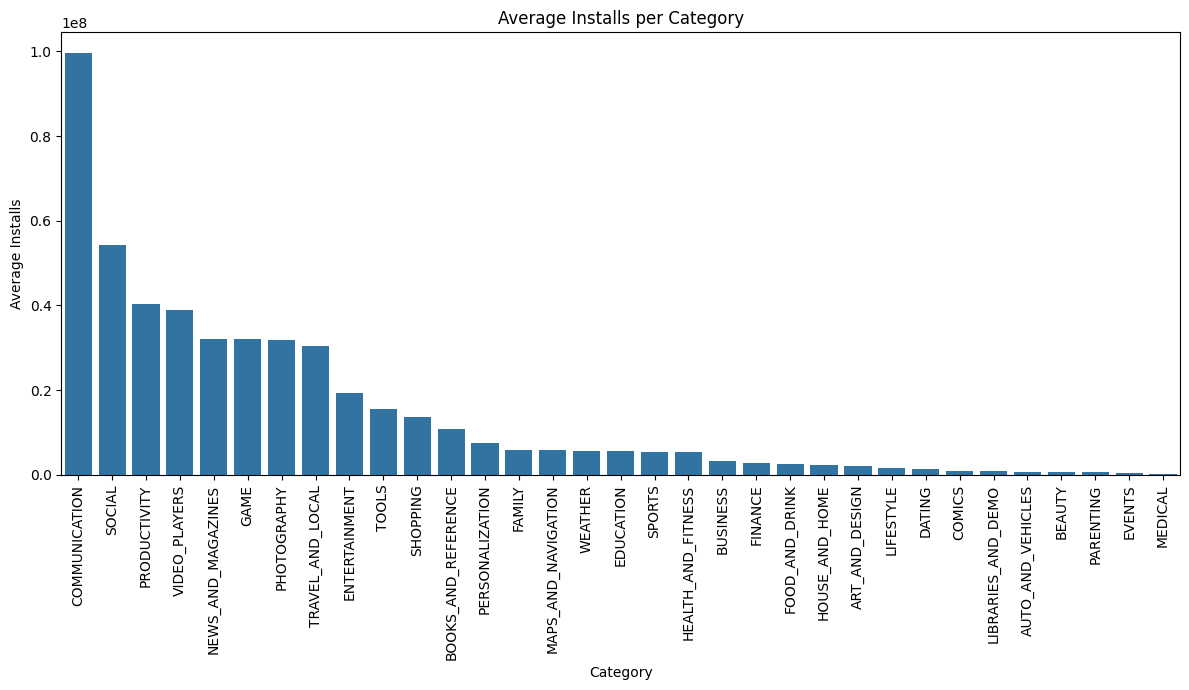

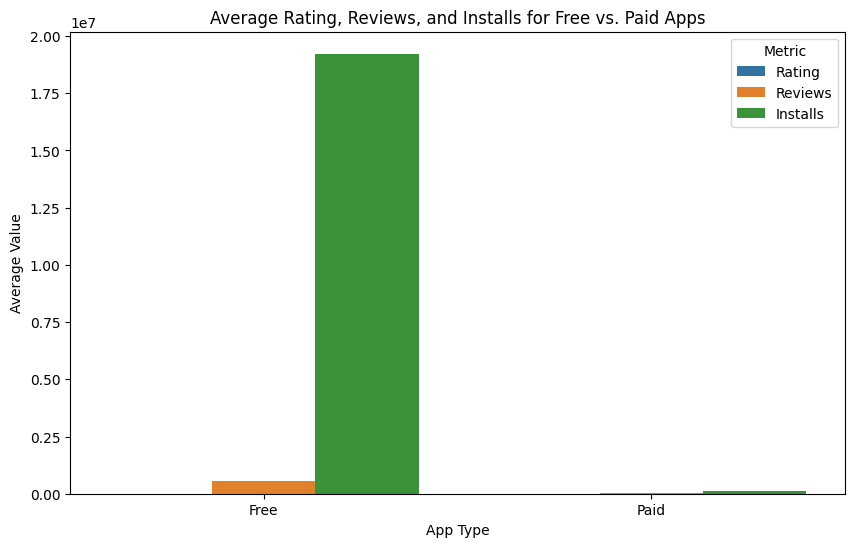

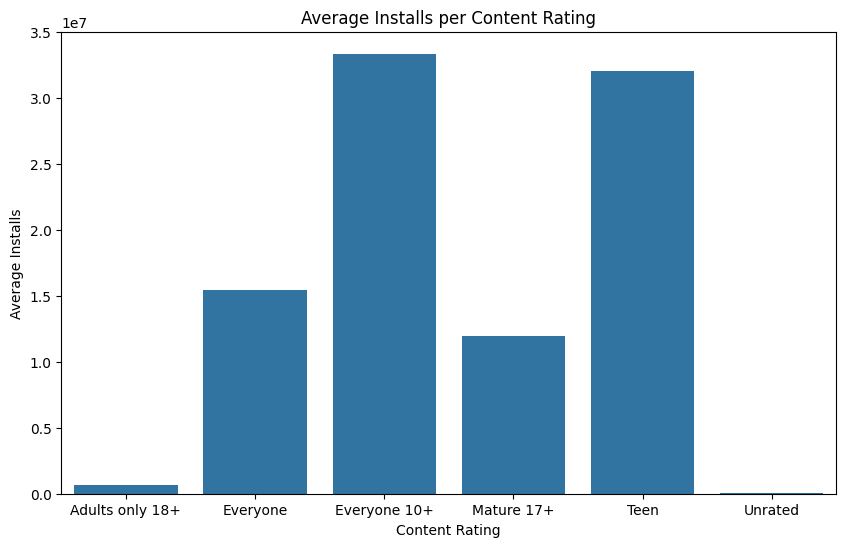

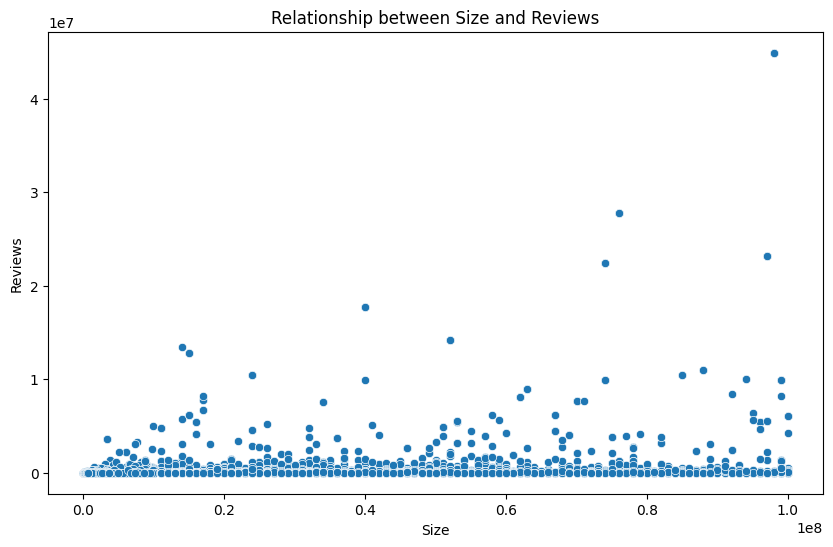

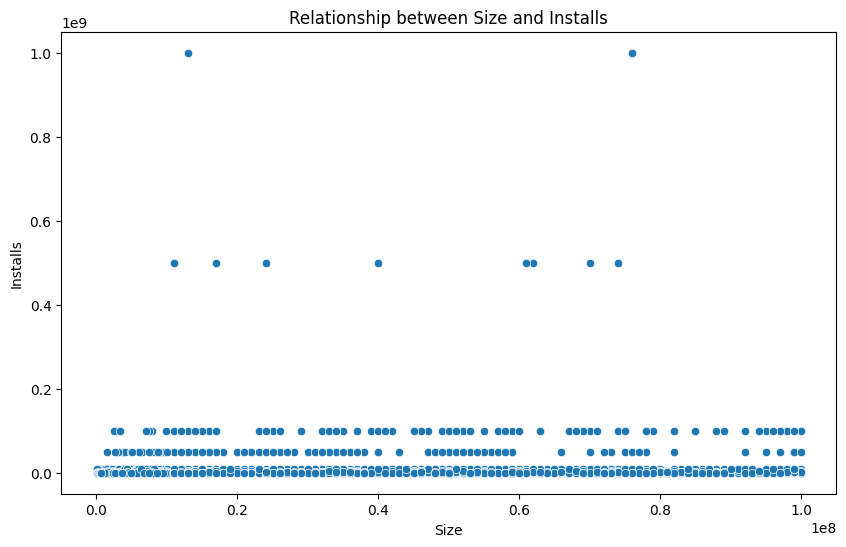

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar plot for average installs per category
plt.figure(figsize=(12, 7))
sns.barplot(x=category_metrics_sorted.index, y='Installs', data=category_metrics_sorted)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Average Installs')
plt.title('Average Installs per Category')
plt.tight_layout()
plt.show()

# 2. Bar plot for average Rating, Reviews, and Installs for Free vs. Paid
price_impact_melted = price_impact.reset_index().melt('Type', var_name='Metric', value_name='Average Value')
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Average Value', hue='Metric', data=price_impact_melted)
plt.xlabel('App Type')
plt.ylabel('Average Value')
plt.title('Average Rating, Reviews, and Installs for Free vs. Paid Apps')
plt.legend(title='Metric')
plt.show()

# 3. Bar plot for average Installs per Content Rating
plt.figure(figsize=(10, 6))
sns.barplot(x=content_rating_impact.index, y='Installs', data=content_rating_impact)
plt.xlabel('Content Rating')
plt.ylabel('Average Installs')
plt.title('Average Installs per Content Rating')
plt.show()

# 4. Scatter plot for Size vs. Reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Reviews', data=df)
plt.xlabel('Size')
plt.ylabel('Reviews')
plt.title('Relationship between Size and Reviews')
plt.show()

# Scatter plot for Size vs. Installs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Installs', data=df)
plt.xlabel('Size')
plt.ylabel('Installs')
plt.title('Relationship between Size and Installs')
plt.show()

## Summarize insights

### Subtask:
Based on the analysis and visualizations, summarize the key factors that seem to contribute to an app's success in the Google Play Store.


**Reasoning**:
Synthesize the findings from the previous analysis steps to summarize the key factors influencing app success.



In [14]:
print("Summary of Key Factors Influencing App Success:")
print("\nCategory Impact:")
print("- Categories with the highest average installs include COMMUNICATION, SOCIAL, and PRODUCTIVITY.")
print("- Category significantly influences the average number of Installs and Reviews.")
print("\nPrice Impact:")
print("- Free apps have drastically higher average Installs and significantly more Reviews compared to Paid apps.")
print("- Paid apps have a slightly higher average Rating.")
print("\nContent Rating Impact:")
print("- Content Ratings 'Everyone 10+' and 'Teen' are associated with higher average Installs.")
print("\nSize Impact:")
print("- Based on the correlation analysis and scatter plots, app Size has a weak positive relationship with Reviews and Installs, suggesting it is not a major determinant of success.")

Summary of Key Factors Influencing App Success:

Category Impact:
- Categories with the highest average installs include COMMUNICATION, SOCIAL, and PRODUCTIVITY.
- Category significantly influences the average number of Installs and Reviews.

Price Impact:
- Free apps have drastically higher average Installs and significantly more Reviews compared to Paid apps.
- Paid apps have a slightly higher average Rating.

Content Rating Impact:
- Content Ratings 'Everyone 10+' and 'Teen' are associated with higher average Installs.

Size Impact:
- Based on the correlation analysis and scatter plots, app Size has a weak positive relationship with Reviews and Installs, suggesting it is not a major determinant of success.


## Summary:

### Data Analysis Key Findings

*   **Category:** App category significantly impacts the average number of Installs and Reviews. Categories like COMMUNICATION, SOCIAL, and PRODUCTIVITY show the highest average installs.
*   **Price:** Free apps have substantially higher average Installs (19,225,820) and significantly more Reviews (551,374) compared to Paid apps (113,010 average installs, 14,477 average reviews). Paid apps have a slightly higher average Rating (4.27) than Free apps (4.19).
*   **Content Rating:** Content Ratings such as 'Everyone 10+' and 'Teen' are associated with higher average installs.
*   **Size:** App Size shows a very weak positive correlation with Reviews (0.2404) and Installs (0.1627), suggesting it is not a primary factor determining an app's success.

### Insights or Next Steps

*   Focus on developing apps within categories with high average installs if broad reach is a primary goal.
*   The "Free" pricing model appears crucial for maximizing downloads and user engagement (reviews and installs) in the Google Play Store.


In [16]:
print(df['Size'].dtype)
print(df['Size'].unique())

float64
[1.90e+07 1.40e+07 8.70e+06 2.50e+07 2.80e+06 5.60e+06 2.90e+07 3.30e+07
 3.10e+06 2.80e+07 1.20e+07 2.00e+07 2.10e+07 3.70e+07 5.50e+06 1.70e+07
 3.90e+07 3.10e+07 4.20e+06 2.30e+07 6.00e+06 6.10e+06 4.60e+06 9.20e+06
 5.20e+06 1.10e+07 2.40e+07      nan 9.40e+06 1.50e+07 1.00e+07 1.20e+06
 2.60e+07 8.00e+06 7.90e+06 5.60e+07 5.70e+07 3.50e+07 5.40e+07 2.01e+05
 3.60e+06 5.70e+06 8.60e+06 2.40e+06 2.70e+07 2.70e+06 2.50e+06 7.00e+06
 1.60e+07 3.40e+06 8.90e+06 3.90e+06 2.90e+06 3.80e+07 3.20e+07 5.40e+06
 1.80e+07 1.10e+06 2.20e+06 4.50e+06 9.80e+06 5.20e+07 9.00e+06 6.70e+06
 3.00e+07 2.60e+06 7.10e+06 2.20e+07 6.40e+06 3.20e+06 8.20e+06 4.90e+06
 9.50e+06 5.00e+06 5.90e+06 1.30e+07 7.30e+07 6.80e+06 3.50e+06 4.00e+06
 2.30e+06 2.10e+06 4.20e+07 9.10e+06 5.50e+07 2.30e+04 7.30e+06 6.50e+06
 1.50e+06 7.50e+06 5.10e+07 4.10e+07 4.80e+07 8.50e+06 4.60e+07 8.30e+06
 4.30e+06 4.70e+06 3.30e+06 4.00e+07 7.80e+06 8.80e+06 6.60e+06 5.10e+06
 6.10e+07 6.60e+07 7.90e+04 8.40e+06 3.70e+